In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np


In [10]:
# define normal distribution function
# Optionally, pass different array of x values tp be transformed; default is np.linspace(-5, 5, 1000)
def normal_dist(mean , sd, x = np.linspace(-10, 10, 1000)):
    prob_density = 1 / (sd * (2 * np.pi) ** .5) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

Probability takes on a value from 0 to 1, with a probability P(X) = 0 
for an event meaning that the stated condition - e.g., a standard 6 sided die will yield a 7 when rolled - would never occur in an infinite number of flips. A probability of 0.5 means that in a sufficiently large number of trials, approximately half of the trials would result in the stated condition. A probability of 1 means all trials would result in the stated condition so that the number of successes in a trial would be equal to the number of attempts.

Probability Distributions display all of the possible values that a random variable X
could take on on the x-axis, and the corresponding probability of that value on the y-axis. Hence, the area under the probability distribution will always be equal to one.

The random variable X Bar, which represents the the mean of a sample drawn from a larger population, defines a sampling distribution, which gives all values possible for X Bar, X bar of i, and the probability of that value occuring. X Bar can take on values falling on its sampling distribution, which describe the likelihood of getting a given mean for a given sample size. This sampling distribution takes on a standard deviation of S / square root of n, otherwise known as the standard error.

. . .

## Lognormal Distribution

In [11]:
import warnings
warnings.filterwarnings("ignore")

def create_lognormal(mean, sd, x = np.linespace(0, 10, 1000)):
    density_points = (1 / x * sd * np.sqrt(2 * np.pi)) * np.e **(
        -(np.log(x) - mean) ** 2 / (2 * sd **2))
    return density_points

x = np.linespace(0, 10, 10000)
mean, sd = 1, 1
log_norm = create_lognormal(mean = mean, sd = sd, x = x)

AttributeError: module 'numpy' has no attribute 'linespace'

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.plot(x, log_norm)
plt.xscale("log")
ax.set_title("Lognormal Distribution with μ = " + " and σ = " +str(sd))

## Binomial Distribution

In [ ]:
def binomial(x, n, p):
    q = 1 - p
    return float(math.factorial(n)) / (
    math.factorial(x) * math.factorial(n - x)) * p ** x * q ** (n - x)
binomial(x = 10, n = 100, p = .5)

In [ ]:
# probability of generating a total between X0 and X1 for a given p, n

def probability_of_outcome(X0, X1, p, n):
    P = 0
    for x in range(0, 50 + 1):
        P += binomial(x = x, n = n, p = p)
    return P    
p, n = .5, 100
X0 = 0
X1 = 50

probability_of_outcome(X0, X1, p, n)

In [ ]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(20, 10))
cmap = cm.get_cmap("Blues")
ymax = binomial(20 * p, 20, p)

for n in range(0, 101, 20):
#    x = int(n * p)
# make a list of probability of every possible outcome
    binom_vars = [binomial(x, n, p) for x in range(n + 1)]
# plot line that is composed of all probabilities
    plt.plot(binom_vars, linewidth = 3,
            label=f"n={n}, p={p}")
# change max y axis value from 1 to the something closer to the maximum
# probability across all range from 0 to n for which we constructed distribution
    ax.set_ylim(ymin = 0, ymax = ymax)

plt.xlabel("$x$\nIncreasing n ------------------------------------------->",
           fontsize=24)
plt.ylabel("$p(x | p, n)$", fontsize=24)
plt.title("Binomial Distribution B(x;n,p) for various p and n Values")
plt.legend()


## Poisson Distribution

"The Poisson probability distribution applies to many random phenomena occurring during a period of time- for example, the number of faulty products coming off an assembly line in a day or week. It also applies to spatial phenomena such as, for example, the number of typing errors on a page.

A Poisson random variable is a discrete variable that can take on any integer value from zero to infinity. The value gives the number of occurrences of the circumstance of interest during a particular period of time or within a particular spatial area. A unit probability mass is assigned to this sample space. Our concern is then with the probability that there will be, for example, zero, one, two, three, etc., calls to the police during a particular time period on a typical day, or that in typing this chapter I will make zero, one, two, etc. errors on a particular page.

The Poisson probability function is"

## Working with Time Series Data

We will be working with stock price data. This data is an instance of time series data. The structure of untransformed time series data often violates the requirements of a random variable that observations be:

identitically distributed
independent
To be identitically distributed means that observations are drawn from the same distribution. To be independent means that neighboring observations should not mutually influence one another. The independence criterion is typically violated for a single variable. Further, if two variables are subject to the I.I.D. assumptions, then not only must observations from a sample be subject to this criterion, but so too observations of the two variables must not be correlated. Here, we will show that individual samples are identically distributed. In a Chapter 6, we will be able to test whether or not the draws are observations of a given sample are independent of their neighbors. And in chpater 7, we will later consider the I.I.D. assumption when working with multiple variables using Ordinary Least Squares regression.

We will first show that unstransformed stock data is not identically distributed. But first, we need to download the data. We will use pandas_datareader to access yahoo finance. If you have not used this module before, install it using the command:

pip install pandas-datareader

If you want to install this library from within Jupyter notebook, use:

!pip install pandas-datareader

We will also need to install yfinance

!pip install yfinance

In [ ]:
!pip install pandas-datareader
!pip install yfinance
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import datetime

In [ ]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA"]
for stock in stocks:
    data_dict[stock] = web.get_data_yahoo(stock, start, end)

In [ ]:
data_dict["MSFT"]

### Create a data frame for the close data ....

In [ ]:
[df["Close"] for df in data_dict.values()]

# data_dict.keys()

In [ ]:
close_data = pd.concat([val["Close"] for val in data_dict.values()], 
                       keys = data_dict.keys(), 
                       axis = 1)
close_data.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")

In [ ]:
fig, ax = plt.subplots(figsize = (24, 16))
close_data.plot.line(ax = ax, legend = True)
ax.set_title("Daily Stock Prices")
ax.set_yscale("log")

In [ ]:
fig, ax = plt.subplots(figsize = (24, 16))
stock = "AAPL"
close_data[stock].hist(bins = [i for i in range(10, 201, 5)])
ax.set_title(stock, fontsize = 50)

In [ ]:
log_data = np.log(close_data)
log_data

In [ ]:
fig, ax = plt.subplots(figsize = (24, 16))
log_data[stock].hist(bins = 50)
ax.set_title(stock, fontsize = 50)

In [ ]:
def graph_yearly_distributions(data, stock, figsize = (24, 12), density = False):
    years = sorted(list(set(data.index.year)))
    fig, ax = plt.subplots(figsize = figsize)
    for year in years:
        color = "C" + str(year % 12)
        year = str(year)
        plot_data = data[stock].loc[year]
        plot_data.plot.hist(color = color, 
                            alpha = .6,
                            label = year,
                            bins = 20,
                            ax = ax)
        ax.axvline(plot_data.mean(),
                  color = color,
                  linewidth = 5,
                  ls = "--")
        ax.set_title(stock)
        ax.legend(bbox_to_anchor = (1, 1))
        
        
graph_yearly_distributions(log_data, stock, density = False)    

In [ ]:
price_change_data = log_data.diff().mul(100)
price_change_data

In [ ]:
# take log diff instead of percent change
# changes are more consistant with log diff, symmetric changes avoids 
# violating statistical assumptions

In [ ]:
graph_yearly_distributions(price_change_data, stock, density = False)

.....................................................................................................

## 3/28

In [ ]:
means_df = pd.DataFrame()
sd_df = pd.DataFrame()
for key in dist_avgs:
# df that centers the distributions at zero by subtracting the mean value from each sample mean
    mean_df[key] = dist_avgs[key].sub(dist_avgs.mean()[key])
# Normalize Distributions
# divide each observation by the distributions standard deviation
    sd_df[key] = means_df[key] / means_df.std()[key]
sd_df

In [ ]:
# save dfs in a single dictionary
df_dct = {"Non-Centered Distributions":dist_avgs,
         "Centered Distributions":means_df,
         "Centered Distributions Normalized by SD":sd_df}
# we will use the keys in the dictionary to call each df
keys = list(df_dct.keys())
# automatically count number of keys in dictionary
num_figs = len(keys)
fig, axs = plt.subplots(3, figsize = (10, 20))
for i in range(num_figs):
   # define the key by the index value
    key = keys[i]
   # select ax by index value
    ax = axs[i]
    # select the dataframe that is linked to key
    plot_df = df_dct[key]
    num_samples = len(plot_df.keys())
    # each distribution will be assigned its own color
    colors = ["C" + str(c + 1) for c in range[num_samples]]

# first, plot the dataframe containing the distributions of the random sample means 
dist_avgs.plot.hist(density=True,
                    ax=ax,
                    bins=20,
                    color=colors,
                    alpha=.5,
                   legend = False)
    # fit a distribution curve on the relevant data
plot_df.plot.kde(ax=axs, color=["C1", "C2", "C3"], legend=False)
ax.set_title(key)

## Simulations

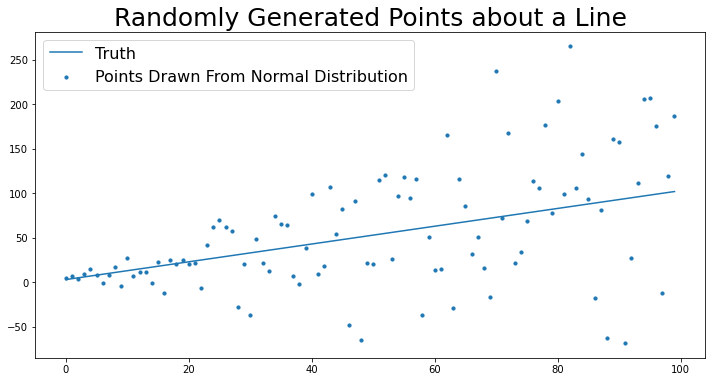

In [4]:
import random
points = []
# generate random points using the values from line as mean and standard deviation
line = np.array([i + 3 for i in range(100)])
for point in line:
    points.append(random.normalvariate(mu = point, sigma = point))
figure = plt.figure(figsize = (12, 6))
plt.plot(line, label = "Truth")
plt.scatter(np.arange(len(points)), points, label = "Points Drawn From Normal Distribution", s = 10)
plt.title("Randomly Generated Points about a Line", fontsize = 25)  
plt.legend(loc = "best", fontsize = 16)
plt.show()

In [5]:
def build_random_data_with_line(y_int, slope, SD = 1):
    line = np.array([slope * (i) + y_int for i in range(100)])
    points = []
    for point in line:
        points.append(random.normalvariate(point, SD))
        return line, points
def plot_line(line, points, line_name = "Truth",
              title = "Randomly Generated Points"):
    figure = plt.figure(figsize = line_name)
    plt.plot(line, label = line_name)
    plt.scatter(np.arange(len(points)), points, s = 10,
                label = title)
    plt.title(title)
    plt.legend(loc = "best", fontsize = 16)
    plt.show()
line, points = build_random_data_with_line(y_int = 10, slope = -1, SD = 10)
plot_line(line, points)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

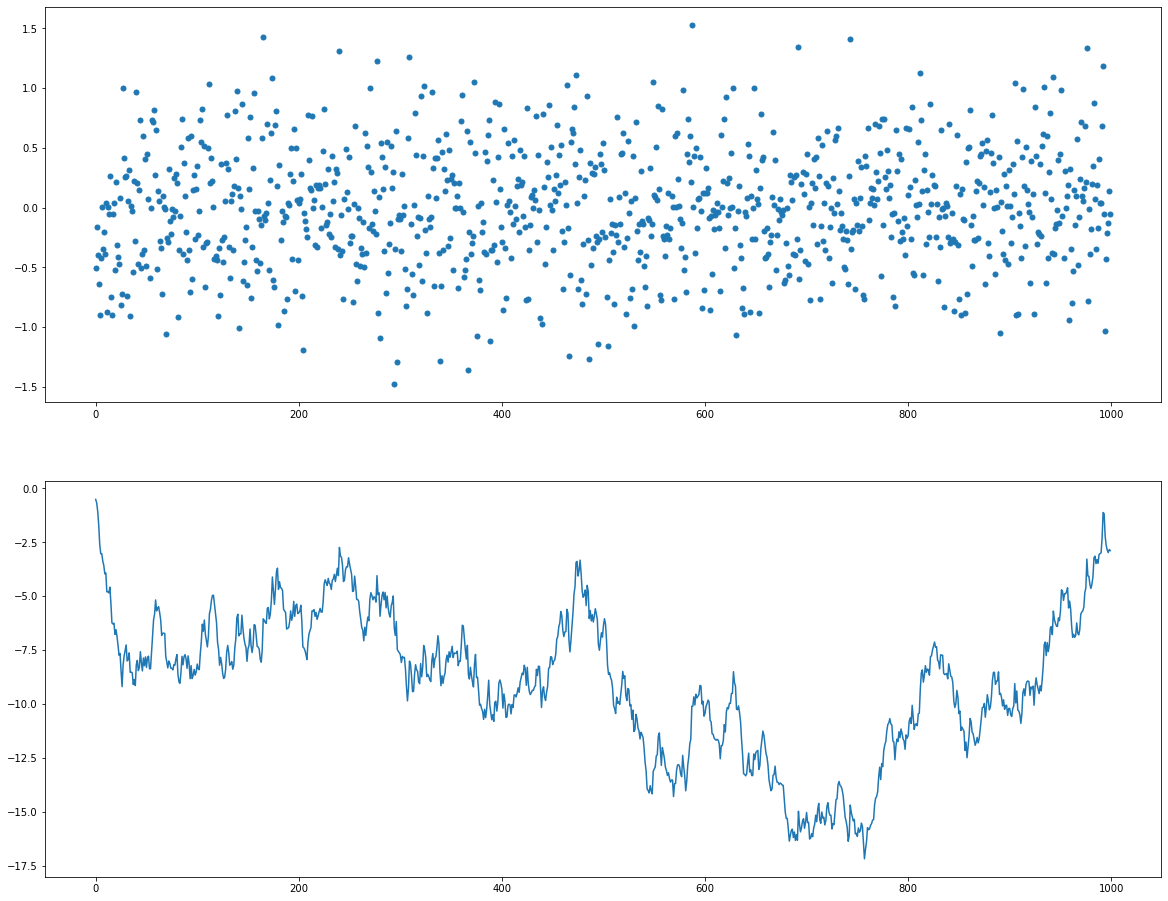

In [6]:
# single simulation 

random_list = [random.normalvariate(0, .5) for i in range(1000)]
fig, axs = plt.subplots(2, figsize = (20, 16))
axs[0].plot(random_list, ls = "", marker = ".", markersize = 10)

simulation = []
for i in range(len(random_list)):
    val = random_list[i]
    if i == 0:
        simulation.append(val)
    else:
        # add last value observed in simulation + change (which is val)
        # this will generate the latest value in the simulation 
        simulation.append(simulation[-1] + val)
axs[1].plot(simulation)
plt.show()
plt.close()

In [7]:
mean = 0
sigma = 1
monte_carlo_sim_dict = {}
num_sims = 2000
periods = 1000
for i in range(num_sims):
    monte_carlo_sim_dict[i] = {}
    # run individual simulation
    for period in range(periods):
        # abbrev dictionary i name
        curr_sim = monte_carlo_sim_dict[i]
        if period == 0:
            curr_sim[period] = random.normalvariate(mean, sigma)
        else:
            curr_sim[period] = curr_sim[period - 1] + random.normalvariate(mean,sigma)
            

NameError: name 'pd' is not defined

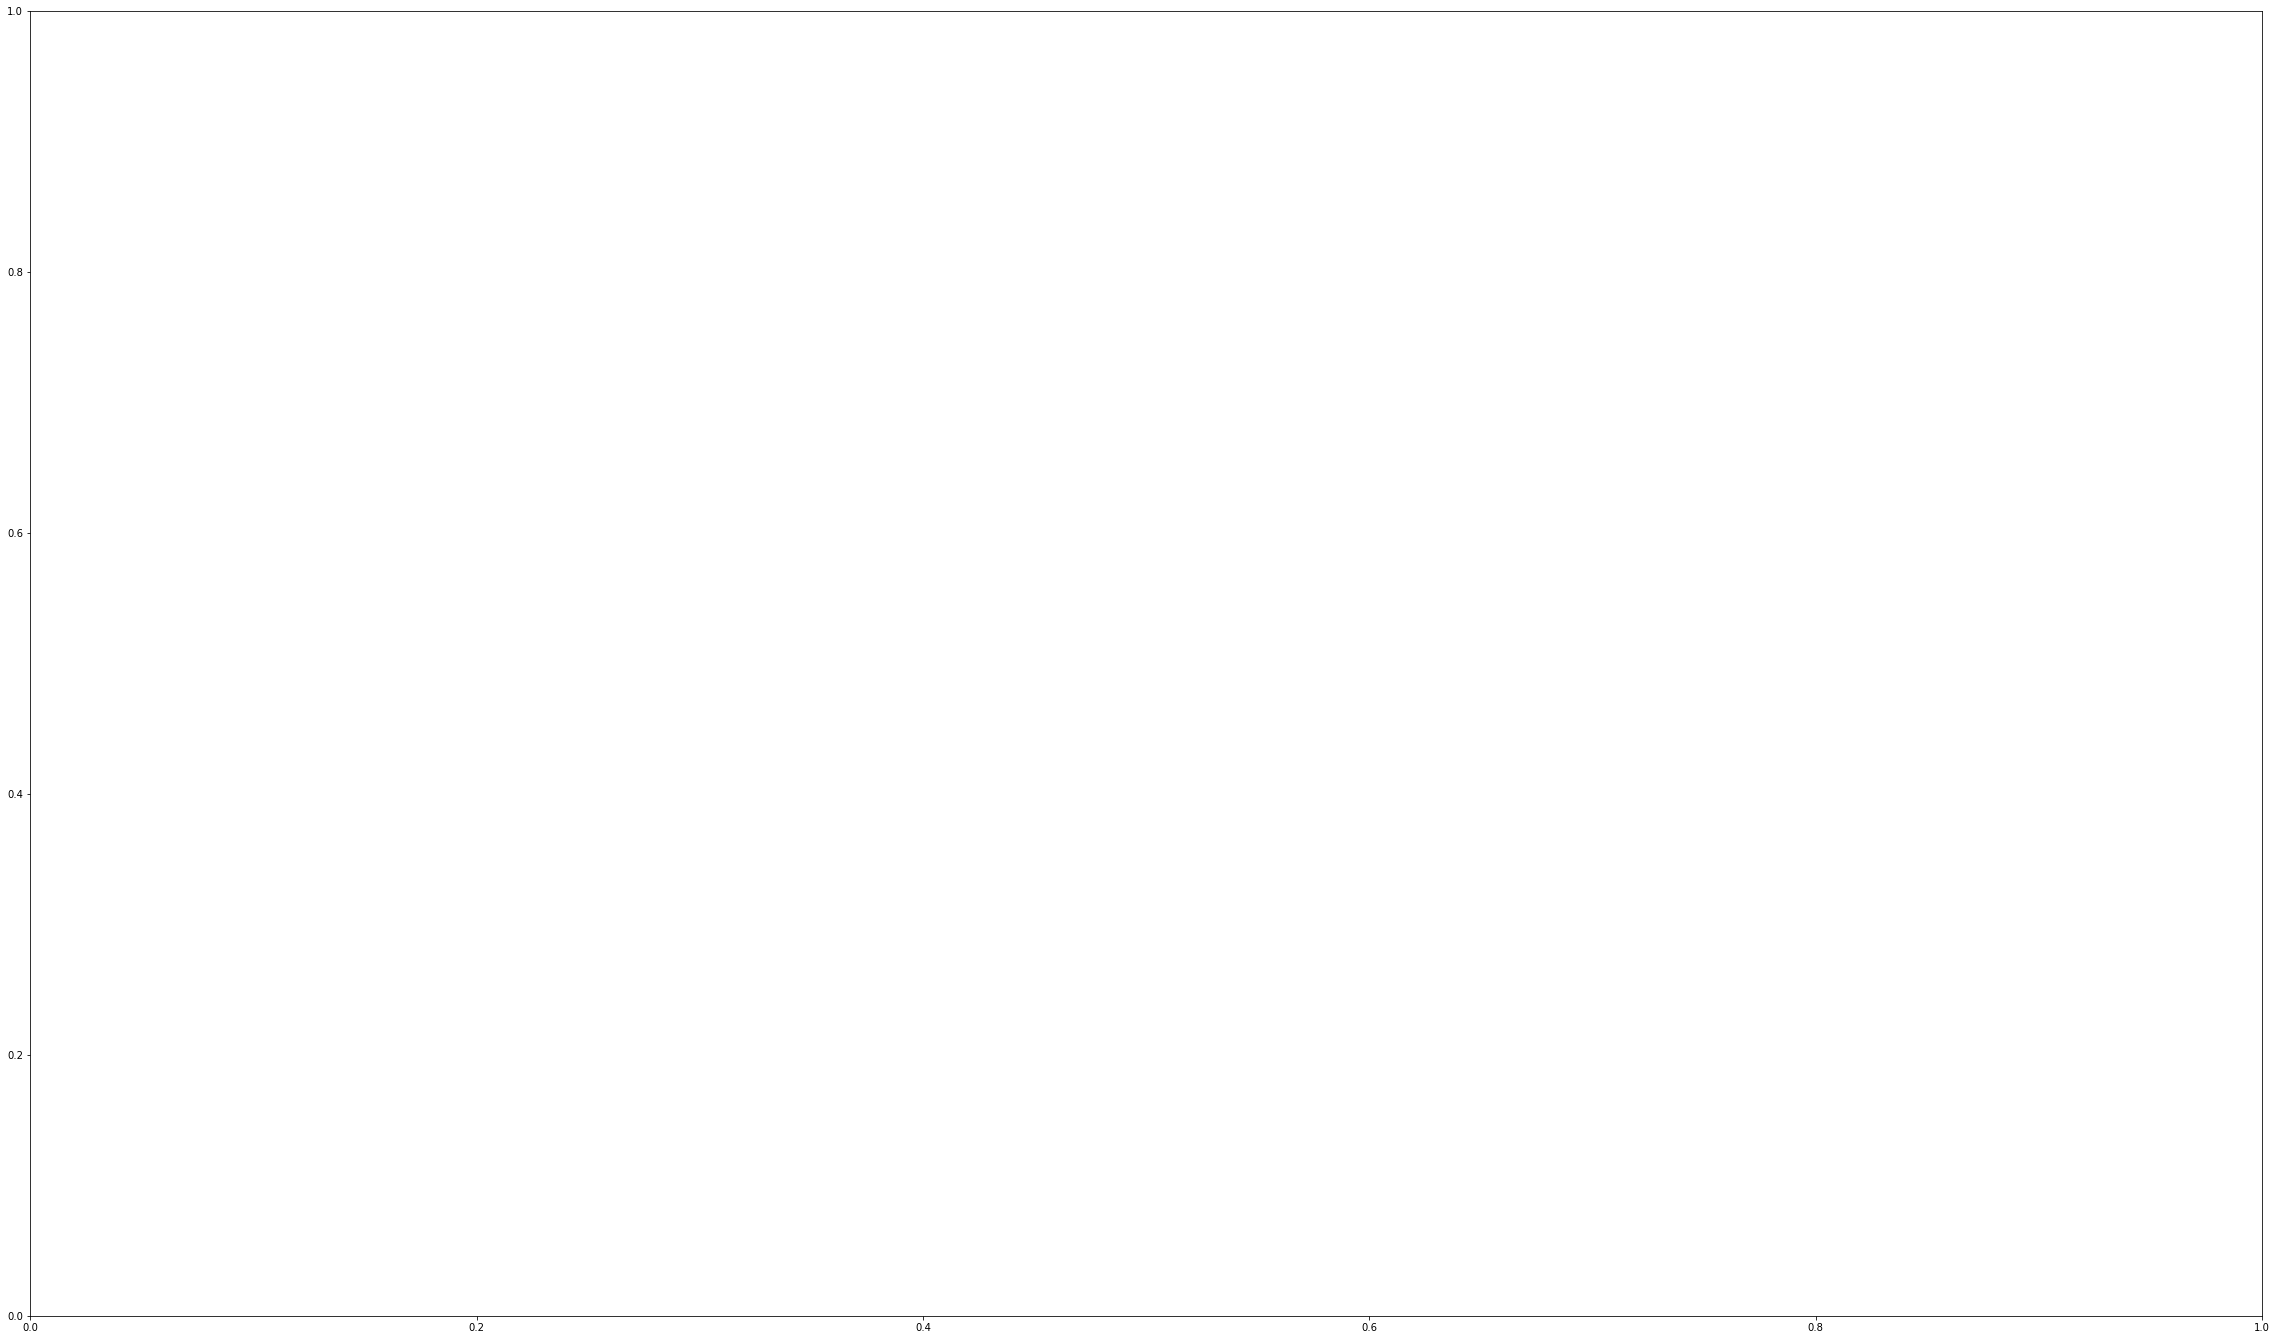

In [12]:
fig, ax = plt.subplots(figsize = (40, 24))
sim_df.plot.line(marker = ".", markersize = .1,
                 color = "k", alpha = .1,
                 ax = ax, legend = False)
# plot average by the period across simulations
sim_df.mean(axis = 1).plot.line(color = "C2", ax = ax, linewidth = 30)
ax.ax